# Psychoinformatics - Week 11 (Examples)
by Tsung-Ren (Tren) Huang (trhuang@g.ntu.edu.tw)

In [ ]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Neural Computation

### 1.1 Logic Operations

In [ ]:
# Supporting functions: -----------------------
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y
#----------------------------------------------

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = AND(xs[0], xs[1]) # try AND, OR, NAND
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


### 1.2 Perceptron w/o learning

-1
-1
1
1
1


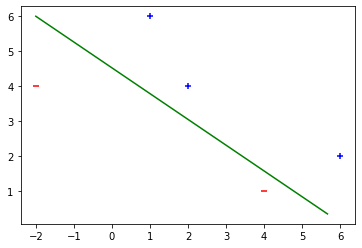

In [ ]:
X = array([   #[x1,x2,bias]
    [-2,4, -1], 
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

y = array([-1,-1,1,1,1])

# The hyperplane:
w=[2, 3, 13] # w0x0+w1x1-w2=0 => x1=(w2-w0x0)/w1
y1=(w[2]-w[0]*(-2))/w[1] # y of the 1st point on the hyperplane: (-2, y1)
y2=(w[2]-w[0]*6)/w[1] # y of the 2nd point on the hyperplane: (6, y2)

# Testing:
for i, x in enumerate(X):
    print(sign(dot(x, w)))
    
# Ploting:
for i, x in enumerate(X): # samples
    if(i<2): scatter(x[0],x[1],marker='_',color='r') # the first two points belong to "-"
    else: scatter(x[0],x[1],marker='+',color='b') # the last three points belong to "+"
plot([-2,y1],[6,y2],'g'); # the hyperplane

## 2 Learning of Neural Networks

### 2.1 Perceptron w/ learning

-1.0
-1.0
1.0
1.0
1.0


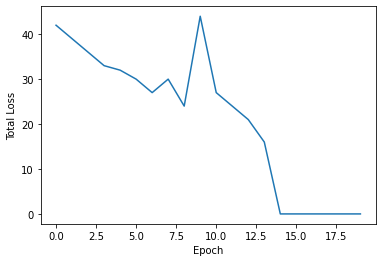

In [ ]:
# Supporting functions: -----------------------
def sgd(X, Y): # Stochastic Gradient Descent
    w = zeros(len(X[0]))
    eta = 1 # learning rate
    epochs = 20 # number of training epochs
    errors = [] # error history during training
    for t in range(epochs):
        total_error = 0
        for p, x in enumerate(X): # p=pattern index
            if (dot(X[p], w)*Y[p]) <= 0:
                total_error += (dot(X[p], w)*Y[p])
                w = w + eta*X[p]*Y[p] # learning rule
        errors.append(total_error*-1)
    plot(errors); xlabel('Epoch'); ylabel('Total Loss')
    return w
#----------------------------------------------


X = array([   #[x1,x2,bias]
    [-2,4, -1], 
    [4,1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

y = array([-1,-1,1,1,1])

# Learning:
w = sgd(X,y)

# Testing:
for i, x in enumerate(X):
    print(sign(dot(X[i], w))) 

### 3.3 Backpropagation on a Three-layered Network w/ Bias Terms

[[0.967 0.033]
 [0.967 0.033]
 [0.973 0.028]
 [0.028 0.972]
 [0.028 0.972]
 [0.021 0.979]]


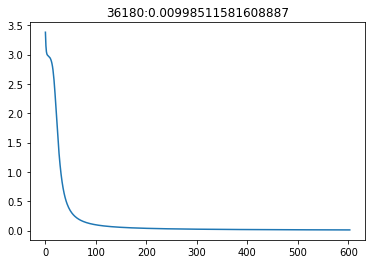

In [ ]:
# Here we train a three-layered network of units 
# with the sigmoid/logistic activation function f
# to associate patterns using backpropagation

set_printoptions(precision=3,suppress=True)

X=array([[1,0,0,0],[0,1,0,0],[1,1,0,0],[0,0,1,0],[0,0,0,1],[0,0,1,1]])
Z=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and inputs 
[Np,Nz]=Z.shape; # find numbers of patterns and outputs 
nHid=1; # set the number of hidden units # try 2
U=random.rand(nHid,Nx+1) # set initial input-hidden connectivity matrix
V=random.rand(Nz,nHid+1) # set initial hidden-output connectivity matrix

eta=0.1; # set the learning rate
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=50000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[]

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(nP); # choose pattern pair at random
    
    # Forward propagation:
    x=append(X[p],1) # adding the bias term
    y0=1/(1+exp(-dot(U,x))) # compute the hidden unit response
    y=append(y0,1) # adding the bias term
    z=1/(1+exp(-dot(V,y))) # compute the output unit response
    e=Z[p]-z # error e for the chosen input
    
    # Backward propagation:
    zg=e*(z*(1-z)) # compute the output error signal
    yg=y*(1-y)*dot(zg,V) # compute hidden error signal
    deltaV=eta*outer(zg,y); # compute the change in hidden-output weights
    deltaU=eta*outer(yg[0:-1],x) # compute change in input-hidden weights
    V=V+deltaV; # update the hidden-output weights
    U=U+deltaU; # update the input-hidden weights       
    
    # Checking if done:
    if(mod(c,10*Np)==0): # every so often check network performance
        x=hstack([X,ones([Np,1])]) # append bias to all input patterns
        y0=1/(1+exp(-dot(x,U.T))) # compute the hidden unit response
        y=hstack([y0,ones([Np,1])]) # adding the bias term
        z=1/(1+exp(-dot(y,V.T))) # compute the output unit response
        totErr=sum((Z-z)**2); # total squared error over all patterns
        totErr_hist.append(totErr)
    if(totErr<tol): 
        break # break if the total errors within tolerance

plot(totErr_hist);
title(str(c)+':'+str(totErr));
print(z) # predicted Z

## 3 Deep Learning Neural Networks

### 3.0 The Iris Dataset

In [ ]:
from sklearn import *
iris = datasets.load_iris()
X=iris.data
Y=iris.target
print(X)
print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### 3.1 A 2-layer Network in Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
encoded = to_categorical(Y) # one-hot encoding
print(encoded)
decoded = argmax(encoded,1) # one-hot decoding
print(decoded)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [ ]:
# Easy problem using all the 4 features:

sss=model_selection.StratifiedShuffleSplit(n_splits=5,test_size=0.1) # 135 vs. 15

model = Sequential()
model.add(Dense(units=3, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

acc=[]
for train_index, test_index in sss.split(X, Y): # 5-fold cross-validation
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    model.fit(X_train, to_categorical(Y_train), epochs=20, batch_size=15)
print(np.mean(acc))

#Jumping to XAI for explanations!

Epoch 1/20
9/9 [==============================] - 0s 2ms/step - loss: 3.5195 - accuracy: 0.3333
Epoch 2/20
9/9 [==============================] - 0s 3ms/step - loss: 1.8173 - accuracy: 0.3111
Epoch 3/20
9/9 [==============================] - 0s 3ms/step - loss: 1.3963 - accuracy: 0.3556
Epoch 4/20
9/9 [==============================] - 0s 2ms/step - loss: 1.2691 - accuracy: 0.3556
Epoch 5/20
9/9 [==============================] - 0s 2ms/step - loss: 1.1866 - accuracy: 0.3630
Epoch 6/20
9/9 [==============================] - 0s 2ms/step - loss: 1.1177 - accuracy: 0.4074
Epoch 7/20
9/9 [==============================] - 0s 2ms/step - loss: 1.0543 - accuracy: 0.3630
Epoch 8/20
9/9 [==============================] - 0s 2ms/step - loss: 1.0032 - accuracy: 0.4593
Epoch 9/20
9/9 [==============================] - 0s 2ms/step - loss: 0.9554 - accuracy: 0.5333
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 0.9079 - accuracy: 0.6296
Epoch 11/20
9/9 [======================

Mean of empty slice.
invalid value encountered in double_scalars


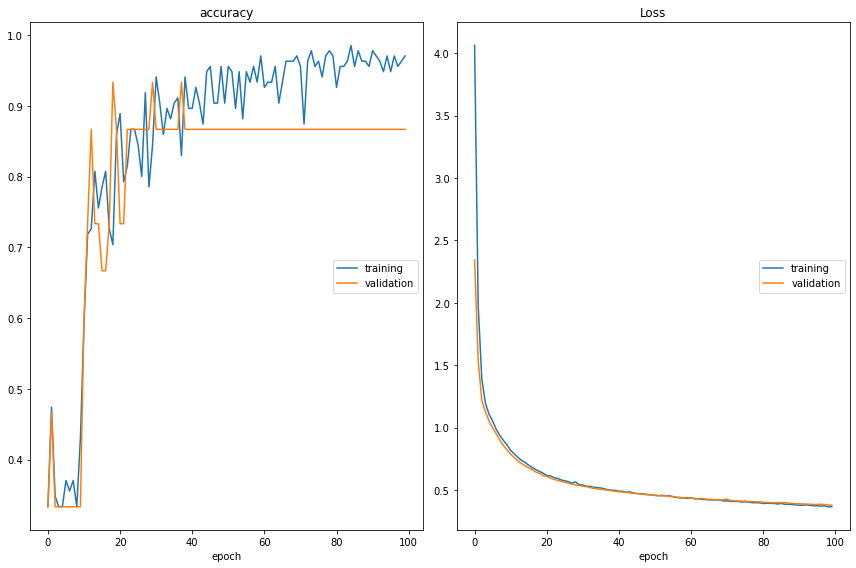

accuracy
	training         	 (min:    0.333, max:    0.985, cur:    0.970)
	validation       	 (min:    0.333, max:    0.933, cur:    0.867)
Loss
	training         	 (min:    0.365, max:    4.063, cur:    0.366)
	validation       	 (min:    0.379, max:    2.343, cur:    0.379)

Epoch 100: val_loss improved from 0.37901 to 0.37867, saving model to dnn.h5
9/9 [==============================] - 0s 53ms/step - loss: 0.3656 - accuracy: 0.9704 - val_loss: 0.3787 - val_accuracy: 0.8667
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (15, 3)                   15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Better visualization for model training

#! pip install livelossplot
from livelossplot import PlotLossesKeras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

model = Sequential()
model.add(Dense(units=3, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=10, verbose=1) # Stop when training
ck = ModelCheckpoint(filepath='dnn.h5', verbose=1, save_best_only=True, monitor='val_loss')
model.fit(X_train, to_categorical(Y_train), epochs=100, batch_size=15, validation_data=(X_test, to_categorical(Y_test)),callbacks=[PlotLossesKeras(),es,ck])

model=load_model('dnn.h5')
model.summary()

### 3.2 A 3-layer Network in Keras

In [ ]:
model = Sequential()
model.add(Dense(units=3, activation='sigmoid'))
model.add(Dense(units=3, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

acc=[]
for train_index, test_index in sss.split(X, Y): # 5-fold cross-validation
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    model.fit(X_train, to_categorical(Y_train), epochs=50, batch_size=15)
    acc.append(argmax(model.predict(X_test),1)==Y_test) # testing
print(np.mean(acc))

Epoch 1/50
9/9 [==============================] - 0s 3ms/step - loss: 1.4332 - accuracy: 0.2889
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 1.3847 - accuracy: 0.3185
Epoch 3/50
9/9 [==============================] - 0s 2ms/step - loss: 1.3433 - accuracy: 0.3037
Epoch 4/50
9/9 [==============================] - 0s 2ms/step - loss: 1.3075 - accuracy: 0.3185
Epoch 5/50
9/9 [==============================] - 0s 2ms/step - loss: 1.2755 - accuracy: 0.3259
Epoch 6/50
9/9 [==============================] - 0s 2ms/step - loss: 1.2474 - accuracy: 0.3333
Epoch 7/50
9/9 [==============================] - 0s 2ms/step - loss: 1.2228 - accuracy: 0.3185
Epoch 8/50
9/9 [==============================] - 0s 2ms/step - loss: 1.2018 - accuracy: 0.2741
Epoch 9/50
9/9 [==============================] - 0s 2ms/step - loss: 1.1827 - accuracy: 0.3037
Epoch 10/50
9/9 [==============================] - 0s 2ms/step - loss: 1.1667 - accuracy: 0.3333
Epoch 11/50
9/9 [======================

## 4 eXplainable AI (XAI)

### 4.1 SHAP values

See more examples [here](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Iris%20classification%20with%20scikit-learn.html#), where feature importance is shown only for Y=0.



In [ ]:
#!pip install shap
import shap

In [ ]:
explainer = shap.KernelExplainer(model, X)
shap_values=explainer.shap_values(X)

  0%|          | 0/150 [00:00<?, ?it/s]

### 4.2 Force plots
Note that:

[1] These are interactive plots! You can click the box under [js] to re-sort the 150 samples on the x-axis (try "original sample ordering"). In other words, a particular x value correspond to a particular sample.

[2] The Iris classification problem has three output dimensions to be explained: Y=[Y1, Y2, Y3]. We'll plot feature importance separately for Y1, Y2, and then Y3.

[3] In the Iris dataset, 
The predicted Y for samples #001-#050 should be close to [1,0,0];
The predicted Y for samples #051-#100 should be close to [0,1,0];
The predicted Y for samples #101-#150 should be close to [0,0,1].

So, when we focus on the explanation for Y1, you will see 50 samples (i.e., samples #1-#50) has predicted Y1=f(x)\~1 and 100 samples (i.e., samples #51-#150) has predicted Y1=f(x)~0. 

[4] In the force plot, red representing features that pushed the f(x) score higher (i.e., toward 1), and blue representing features that pushed the f(x) score lower (i.e., toward 0).

In [ ]:
# Visualize feature importance for Y=[1,0,0] (setosa):
# You can see that 'petal length' is the diagnostic feature of setosa
shap.initjs()
shap.force_plot(explainer.expected_value[0],shap_values[0], feature_names=iris.feature_names)

In [ ]:
# Visualize feature importance for Y=[0,1,0] (versicolor):
# 'petal length' & 'petal width' are both informative for versicolor
shap.initjs()
shap.force_plot(kernel_shap.expected_value[1],shap_values[1], feature_names=iris.feature_names)

In [ ]:
# Visualize feature importance for Y=[0,0,1] (virginica):
# 'petal length' & 'petal width' are both informative for virginica
shap.initjs()
shap.force_plot(kernel_shap.expected_value[2],shap_values[2], feature_names=iris.feature_names)